In [4]:
import os
import pandas as pd
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Initialize Spotify API token
# Must set SPOTIPY_CLIENT_ID and SPOTIPY_CLIENT_SECRET env variables prior to running
os.environ["SPOTIPY_CLIENT_ID"] = <CLIENT_ID>
os.environ["SPOTIPY_CLIENT_SECRET"] = <CLIENT_SECRET>
auth_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(auth_manager=auth_manager)

In [5]:
#playlists = sp.user_playlists("bozb44ww3zjq2nlk90r3s72mq")
playlists = sp.user_playlists("cegersdoerfer")
playlist_ids = []
for i in playlists['items']:
    playlist_ids.append(i['id'])
    
print(playlist_ids)


['5iTBt0BuVCzmJF7kAPa8Aj', '6hWI9UgQ3PrIVvVzVlJxC4', '06EpmcXGLcw4EowVkwF4Am', '7AKYuPHlWuF4GjwGdndAwg', '2Rw1tSB38iv4t1dA1MmlMV', '6sXtgaE4pCWazXzwbAj39W']


In [6]:
# intitialize playlist dict for all playlists and their track info
playlists = {}
for playlist_id in playlist_ids:
    playlist_tracks = []
    offset = 0
    cont = True
    while cont is True:
        playlist_name = sp.playlist(playlist_id)['name']
        playlist_info = sp.playlist_items(playlist_id, offset=offset)
        if len(playlist_info['items']) < 100:
            cont = False
        playlist_tracks.append(playlist_info)
        offset += 100
        
    playlists[playlist_name]= {"track_name":[],
                               "track_id":[],
                               "album_name":[],
                               "album_id":[],
                               "artist_name":[],
                               "artist_id":[]}
    
    track_names, track_ids, album_names, album_ids, artist_names, artist_ids = [],[],[],[],[],[]
    for tracks in playlist_tracks:
        for track_info in tracks['items']:
            try:
                # store track_name, track_id, album_name, album_id, artist_name, artist_id
                playlists[playlist_name]['track_name'].append(track_info['track']['name'])
                playlists[playlist_name]['track_id'].append(track_info['track']['id']) 
                playlists[playlist_name]['album_name'].append(track_info['track']['album']['name'])
                playlists[playlist_name]['album_id'].append(track_info['track']['album']['id'])
                playlists[playlist_name]['artist_name'].append([i['name'] for i in track_info['track']['artists']])
                playlists[playlist_name]['artist_id'].append([i['id'] for i in track_info['track']['artists']])
            except TypeError:
                print("       ", track_info['track'])
        
    playlists[playlist_name] = pd.DataFrame.from_dict(playlists[playlist_name])

for name in playlists:
    print(name + ": " + str(len(playlists[name])) + " songs")


Calm: 1 songs
Basic stuff: 3 songs
U13: 256 songs
8:00 PM: 108 songs
My playlist #6: 15 songs
Allow it: 11 songs


In [7]:
for key in list(playlists.keys()):
    if len(playlists[key]) < 20:
        del playlists[key]

for p in playlists:
    print(p)

U13
8:00 PM


In [8]:
playlist_names = [p for p in playlists]
valid = False
while not valid:
    inp = input("Choose which playlist you would like to analyze (" + ', '.join(playlist_names) + ") : ")
    if inp in playlists:
        valid = True
        
playlistName = inp
chosenPlaylist = playlists[inp]

Choose which playlist you would like to analyze (U13, 8:00 PM) : 8:00 PM


In [9]:
# intitialize audio features df
trackFeaturesDict = {"track_id": chosenPlaylist.iloc[:, 1].tolist(),
                       "acousticness": [],
                       "danceability": [],
                       "energy": [],
                       "key": [],
                       "loudness": [],
                       "speechiness": [],
                       "instrumentalness": [],
                       "liveness": [],
                       "valence": [],
                       "tempo": [],
                       "scale_mode": [],
                       "time_signature": []}

# fill audio features df
for track_id in chosenPlaylist.iloc[:, 1]:
    features = sp.audio_features(track_id)[0]
    trackFeaturesDict['acousticness'].append(features['acousticness'])
    trackFeaturesDict['danceability'].append(features['danceability'])
    trackFeaturesDict['energy'].append(features['energy'])
    trackFeaturesDict['key'].append(features['key'])
    trackFeaturesDict['loudness'].append(features['loudness'])
    trackFeaturesDict['speechiness'].append(features['speechiness'])
    trackFeaturesDict['instrumentalness'].append(features['instrumentalness'])
    trackFeaturesDict['liveness'].append(features['liveness'])
    trackFeaturesDict['valence'].append(features['valence'])
    trackFeaturesDict['tempo'].append(features['tempo'])
    trackFeaturesDict['scale_mode'].append(features['mode'])
    trackFeaturesDict['time_signature'].append(features['time_signature'])
    
trackFeaturesDF = pd.DataFrame.from_dict(trackFeaturesDict)


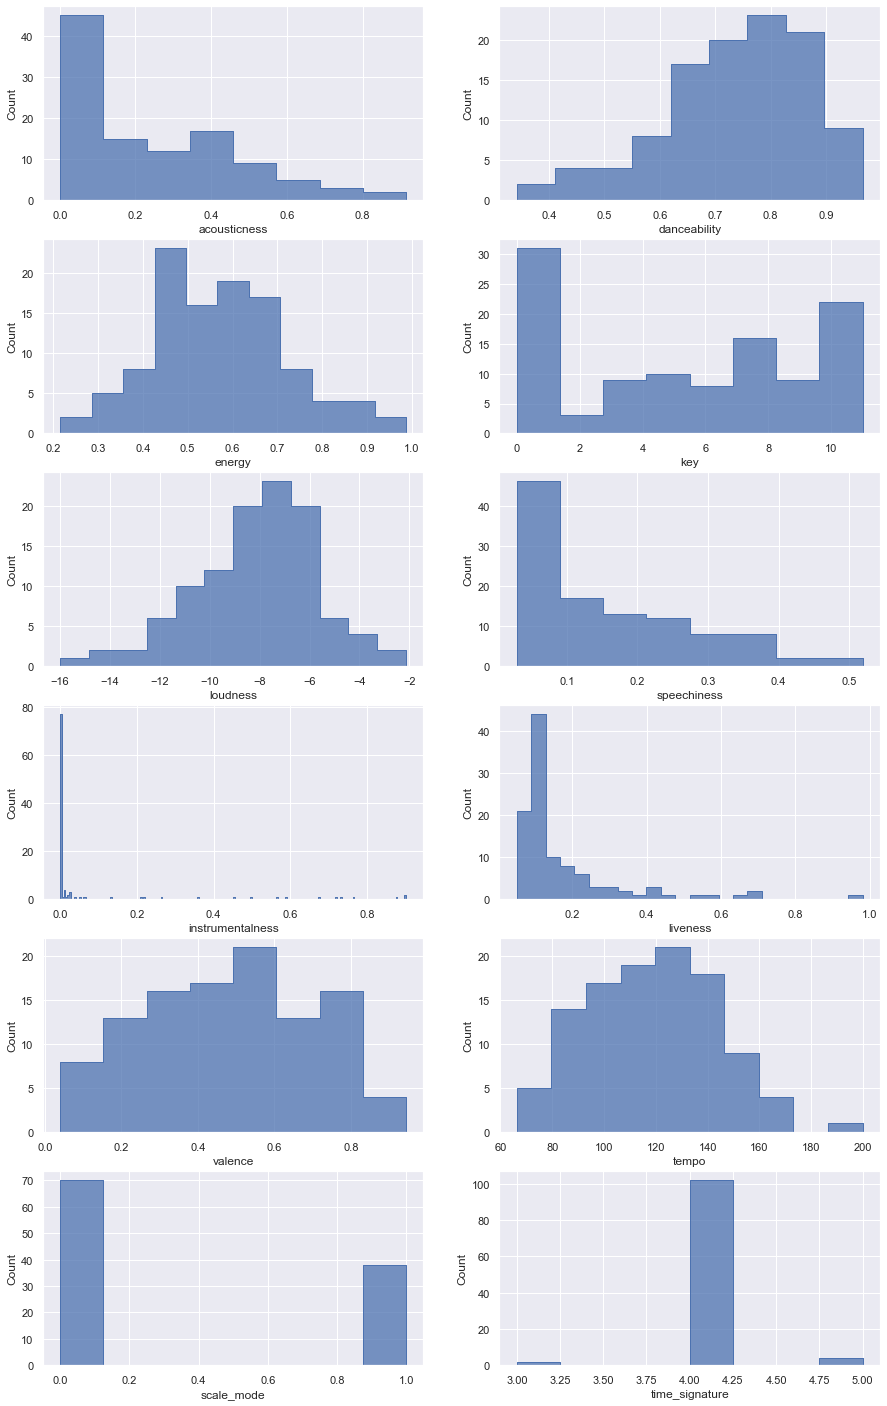

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot histogram for each audio feature
sns.set_theme()
sns.set_context('notebook')
fig = plt.figure(figsize=(15,25))

ax0 = fig.add_subplot(6,2,1)
sns.histplot(ax=ax0, data=trackFeaturesDF['acousticness'], element='step')
ax1 = fig.add_subplot(6,2,2)
sns.histplot(ax=ax1, data=trackFeaturesDF['danceability'], element='step')
ax2 = fig.add_subplot(6,2,3)
sns.histplot(ax=ax2, data=trackFeaturesDF['energy'], element='step')
ax3 = fig.add_subplot(6,2,4)
sns.histplot(ax=ax3, data=trackFeaturesDF['key'], element='step')
ax4 = fig.add_subplot(6,2,5)
sns.histplot(ax=ax4, data=trackFeaturesDF['loudness'], element='step')
ax5 = fig.add_subplot(6,2,6)
sns.histplot(ax=ax5, data=trackFeaturesDF['speechiness'], element='step')
ax6 = fig.add_subplot(6,2,7)
sns.histplot(ax=ax6, data=trackFeaturesDF['instrumentalness'], element='step')
ax7 = fig.add_subplot(6,2,8)
sns.histplot(ax=ax7, data=trackFeaturesDF['liveness'], element='step')
ax8 = fig.add_subplot(6,2,9)
sns.histplot(ax=ax8, data=trackFeaturesDF['valence'], element='step')
ax9 = fig.add_subplot(6,2,10)
sns.histplot(ax=ax9, data=trackFeaturesDF['tempo'], element='step')
ax10 = fig.add_subplot(6,2,11)
sns.histplot(ax=ax10, data=trackFeaturesDF['scale_mode'], element='step')
ax11 = fig.add_subplot(6,2,12)
sns.histplot(ax=ax11, data=trackFeaturesDF['time_signature'], element='step')

plt.show()
        

In [11]:
# show the song with the max value in each category
joinedDF = pd.merge(chosenPlaylist, trackFeaturesDF, how='inner', left_index=True, right_index=True)
print("acousticness max: ", joinedDF.iloc[joinedDF['acousticness'].idxmax()]['track_name'])
print("danceability max: ", joinedDF.iloc[joinedDF['danceability'].idxmax()]['track_name'])
print("energy max: ", joinedDF.iloc[joinedDF['energy'].idxmax()]['track_name'])
print("key max: ", joinedDF.iloc[joinedDF['key'].idxmax()]['track_name'])
print("loudness max: ", joinedDF.iloc[joinedDF['loudness'].idxmax()]['track_name'])
print("speechiness max: ", joinedDF.iloc[joinedDF['speechiness'].idxmax()]['track_name'])
print("instrumentalness max: ", joinedDF.iloc[joinedDF['instrumentalness'].idxmax()]['track_name'])
print("liveness max: ", joinedDF.iloc[joinedDF['liveness'].idxmax()]['track_name'])
print("valence max: ", joinedDF.iloc[joinedDF['valence'].idxmax()]['track_name'])
print("tempo max: ", joinedDF.iloc[joinedDF['tempo'].idxmax()]['track_name'])
print("time_signature: ", joinedDF.iloc[joinedDF['time_signature'].idxmax()]['track_name'])


acousticness max:  Space
danceability max:  Elastic
energy max:  All the Time - DJ Swisha Remix
key max:  Tunnel Vision
loudness max:  Levitate
speechiness max:  Round & Round
instrumentalness max:  Lick in Heaven - Proc Fiskal Whittaedae Remix
liveness max:  Call Me (feat. Maverick Sabre)
valence max:  Crush
tempo max:  Crazy Tings
time_signature:  Cucumber


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#scaledAudioFeatures = scaler.fit_transform(trackFeaturesDF.iloc[:, 1:])
scaledAudioFeatures = scaler.fit_transform(trackFeaturesDF[['acousticness', 'danceability', 
                                                            'energy', 'key',
                                                            'loudness', 'instrumentalness',
                                                            'valence', 'tempo', 
                                                            'scale_mode']])

In [39]:
from minisom import MiniSom

mapX = 3
mapY = 3
som = MiniSom(mapX, mapY, scaledAudioFeatures.shape[1], sigma=1.5, learning_rate=.5, 
              neighborhood_function='gaussian', random_seed=0)
som.train(scaledAudioFeatures, 500)
print(som.distance_map().T)

[[0.47501955 0.64560472 0.50270552]
 [0.57848236 1.         0.60406145]
 [0.31319123 0.53441922 0.35974122]]


In [40]:
win_map = som.win_map(scaledAudioFeatures)
subgroupLabel = 1
joinedDF['subgroup'] = 0
counter = 0
for point in win_map:
    for row in win_map[point]:
        counter += 1
        row = scaler.inverse_transform(row)
        joinedDF.loc[(round(joinedDF['acousticness'], 6) == round(row[0], 6)) & 
                     (round(joinedDF['danceability'], 6) == round(row[1], 6)), 'subgroup'] = subgroupLabel
    subgroupLabel += 1

/Users/chris_egersdoerfer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/chris_egersdoerfer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/chris_egersdoerfer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/chris_egersdoerfer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/chris_egersdoerfer/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/chris_egersdo

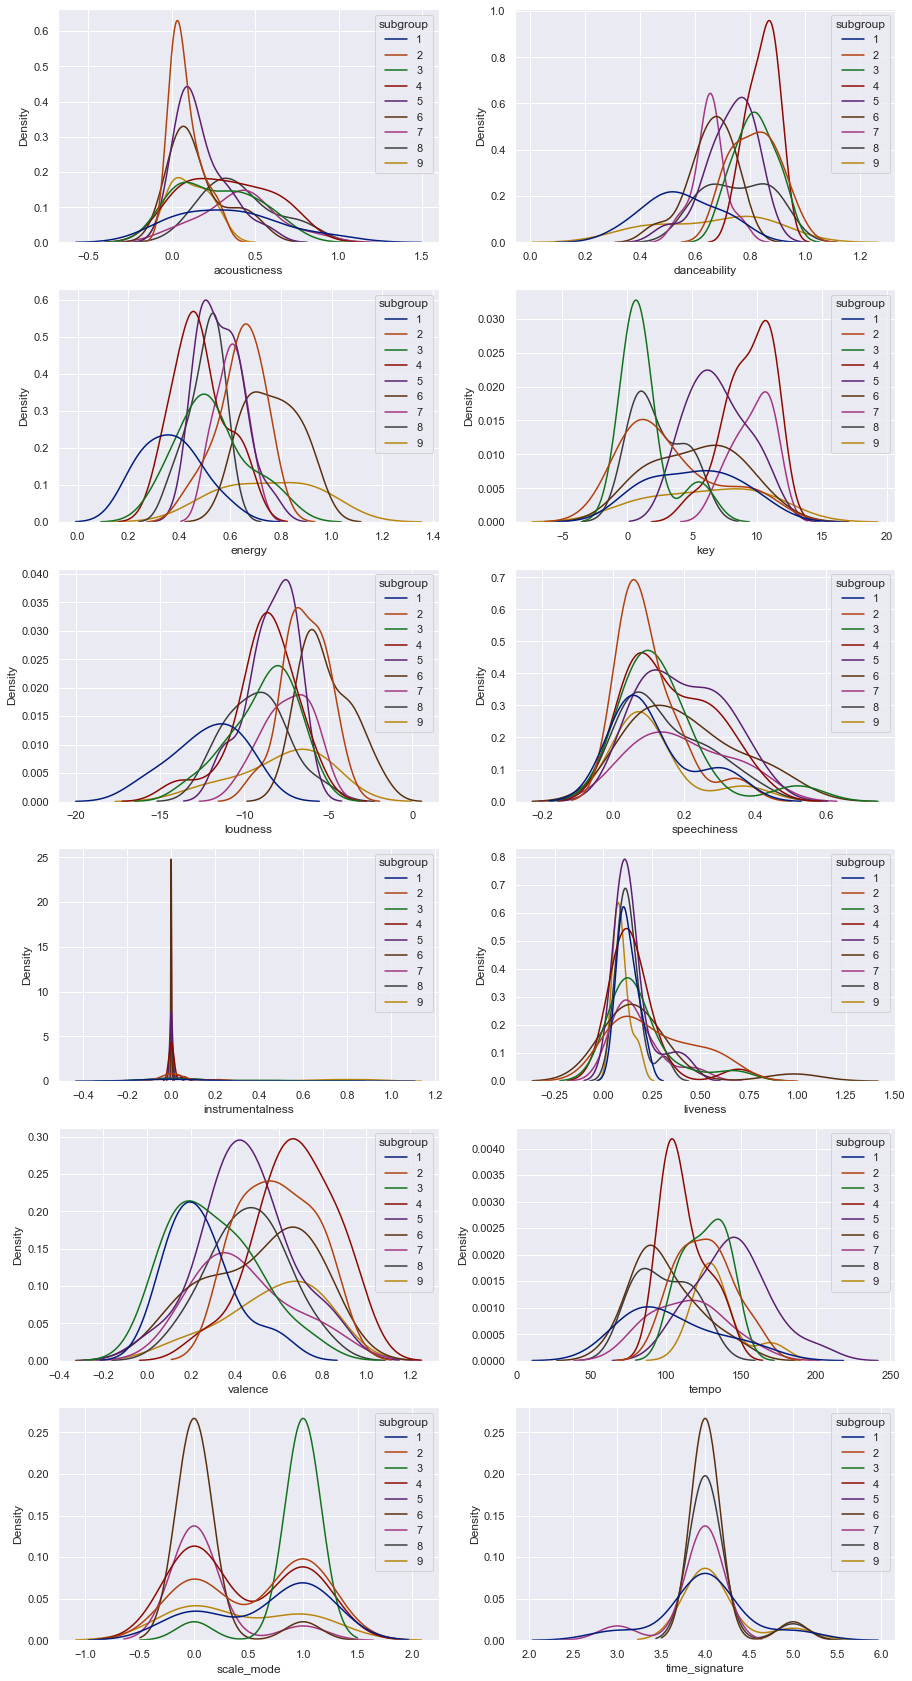

In [41]:
fig = plt.figure(figsize=(15,30))

ax0 = fig.add_subplot(6,2,1)
sns.kdeplot(data=joinedDF, x='acousticness', ax=ax0, hue='subgroup', palette = 'dark')
ax1 = fig.add_subplot(6,2,2)
sns.kdeplot(data=joinedDF, x='danceability', ax=ax1, hue='subgroup', palette = 'dark')
ax2 = fig.add_subplot(6,2,3)
sns.kdeplot(data=joinedDF, x='energy', ax=ax2, hue='subgroup', palette = 'dark')
ax3 = fig.add_subplot(6,2,4)
sns.kdeplot(data=joinedDF, x='key', ax=ax3, hue='subgroup', palette = 'dark')
ax4 = fig.add_subplot(6,2,5)
sns.kdeplot(data=joinedDF, x='loudness', ax=ax4, hue='subgroup', palette = 'dark')
ax5 = fig.add_subplot(6,2,6)
sns.kdeplot(data=joinedDF, x='speechiness', ax=ax5, hue='subgroup', palette = 'dark')
ax6 = fig.add_subplot(6,2,7)
sns.kdeplot(data=joinedDF, x='instrumentalness', ax=ax6, hue='subgroup', palette = 'dark')
ax7 = fig.add_subplot(6,2,8)
sns.kdeplot(data=joinedDF, x='liveness', ax=ax7, hue='subgroup', palette = 'dark')
ax8 = fig.add_subplot(6,2,9)
sns.kdeplot(data=joinedDF, x='valence', ax=ax8, hue='subgroup', palette = 'dark')
ax9 = fig.add_subplot(6,2,10)
sns.kdeplot(data=joinedDF, x='tempo', ax=ax9, hue='subgroup', palette = 'dark')
ax10 = fig.add_subplot(6,2,11)
sns.kdeplot(data=joinedDF, x='scale_mode', ax=ax10, hue='subgroup', palette = 'dark')
ax11 = fig.add_subplot(6,2,12)
sns.kdeplot(data=joinedDF, x='time_signature', ax=ax11, hue='subgroup', palette = 'dark')

plt.show()

[[ 0.40847715 -1.44299835 -1.37855765 -0.11016613 -1.64925227 -0.04484443
  -1.05104835 -0.58307695  0.65923172  0.40847715]
 [-0.74302805  0.63385211  0.42970586 -0.57391309  0.71445578 -0.19616983
   0.49821878  0.29613964  0.45980028 -0.74302805]
 [ 0.10072837  0.63329757 -0.2824721  -1.09544683 -0.30213962  0.17392535
  -0.81197184  0.31068982  1.19616254  0.10072837]
 [ 0.39732252  0.84291116 -0.61524529  1.01720063 -0.28868816 -0.35485541
   0.85703791 -0.25939016  0.17934981  0.39732252]
 [-0.32549371 -0.05668049 -0.08118023  0.37272875 -0.09247801 -0.37378976
  -0.14417563  1.043643   -0.7367884  -0.32549371]
 [-0.41060987 -0.61363455  1.27015026 -0.05819032  1.24412237 -0.38925428
   0.13342658 -0.7561562  -0.57570915 -0.41060987]
 [ 0.68214626 -0.6519874   0.18836517  1.09431692  0.29530488 -0.39094511
  -0.18981174 -0.15751324 -0.50411838  0.68214626]
 [ 0.70366203  0.13149534 -0.46921394 -0.83659494 -0.45524849 -0.11586565
  -0.09919362 -0.801886   -0.7367884   0.70366203]


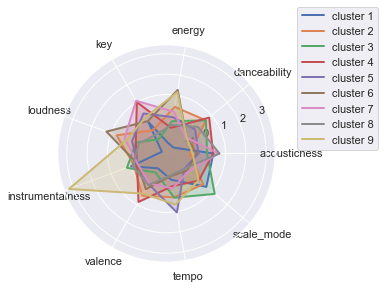

In [46]:
labels=np.array(['acousticness','danceability','energy','key','loudness','instrumentalness','valence','tempo','scale_mode'])
stats=joinedDF.groupby('subgroup').mean()
stats=stats.loc[:,labels].values
stats = scaler.transform(stats)
stats = stats.transpose()
stats=np.concatenate((stats,[stats[0]]))
angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
fig= plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, '-', linewidth=2)
clusterNames = []
for i in joinedDF['subgroup'].unique():
    name = 'cluster ' + str(i)
    clusterNames.append(name)
ax.legend(labels=[i for i in clusterNames], loc=1, bbox_to_anchor=(1.5,1.2))
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles[:-1] * 180/np.pi, labels)
#ax.set_title([joinedDF.loc[386,"Name"]])
ax.grid(True)
print(stats.transpose())

plt.show()


In [47]:
for subgroup in joinedDF['subgroup'].unique():
    print(subgroup)
    
    for track in joinedDF.loc[joinedDF['subgroup'] == subgroup, 'track_name']:
        print("     ", track)
    print("\n")

1
      Never Would Have Made It
      I Beg to Differ
      Puerto Rico
      Mandy
      New Level
      Little Lies
      Check 4 U - Original
      Kuvasz In Snow
      Space


2
      claws
      Steppin Out
      BMO
      telly
      White Walls
      Famous
      Elastic
      Wicked
      MHM
      #Sweetladychallenge
      4K
      Haze
      Dear Miami
      Murphy's Law


3
      All Under One Roof Raving
      Solo
      Round & Round
      Make Room
      Ghostin'
      TAKING TRIPS
      Comic Sans (feat. Jack Harlow)
      Running (feat. Ghetts)
      Yo Love - From "Queen & Slim: The Soundtrack"
      Off Guard
      Killing The Rats
      Something More - Edit
      Sorry


4
      Ghost (feat. Vince Staples)
      Silver Tongue Devil (feat. Shenseea)
      Baby
      Carefree
      Crush
      Kiss U Right Now
      Los Pollos Hermanos
      Poison (feat. Take A Daytrip, Obongjayar, Santi)
      Juicy
      Get Lost
      Sailors' Superstition
      Fountains (with T